## Classical simulation of triple dot

This classical simulation of a triple dot system investigates the behaviour of the dot system at a fixed total electron number n=3. It specifically investigates the behaviour of the honeycomb measurements around different charge distribution states.

### Import packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from qtt.simulation.classicaldotsystem import ClassicalDotSystem, TripleDot


<IPython.core.display.Javascript object>

/Users/laurens/Qcodes/qtt/qtt/pmatlab.py:174: UserWarning: pmatlab: could not load skimage.filters, not all functionality is available
  warnings.warn('pmatlab: could not load skimage.filters, not all functionality is available')


### Initialize dot system

In [2]:
DotSystem = TripleDot(maxelectrons=3)

DotSystem.alpha = np.array([[1.0, 0.5, 0.25],
                            [0.5, 1.0, 0.5],
                            [0.25, 0.5, 1.0]])
DotSystem.W = 2*np.array([5.0, 1.0, 5.0])
DotSystem.Eadd = np.array([54.0, 54.0, 54.0])
DotSystem.mu0 = np.array([-25.0, -25.0, -25.0])

## 1. Standard Honeycomb example

### Help functions for calculating gate planes

In [3]:
def create_linear_gate_matrix(gate_points, steps_x, steps_y):
    x_y_start = gate_points[0]
    x_end = gate_points[1]
    y_end = gate_points[2]
    step_x = ((x_end-x_y_start) * 1.0 / (steps_x-1))
    step_y = ((y_end-x_y_start) * 1.0 / (steps_y-1))
    return [[start_x+i*step_x for i in range(steps_x)] for start_x in [x_y_start+i*step_y for i in range(steps_y)]]

def calculate_end_points(ref_point,ref_value,dirVecX,dirVecY,rangeX,rangeY):
    gate_points = []
    gate_points.append(ref_value-(rangeX*(1-ref_point[0])*dirVecX)-(rangeY*(1-ref_point[1])*dirVecY))
    gate_points.append(gate_points[0]+rangeX*dirVecX)
    gate_points.append(gate_points[0]+rangeY*dirVecY)
    return gate_points

def create_all_gate_matrix(ref_point, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY):
    gate_matrix=np.zeros((3,pointsX,pointsY))
    for gate in range(len(ref_value)):
        end_points = calculate_end_points(ref_point,ref_value[gate],dirVecX[gate],dirVecY[gate],rangeX,rangeY)
        gate_matrix[gate]= create_linear_gate_matrix(end_points,pointsX,pointsY)
    return gate_matrix

### Define gate plane

simulatehoneycomb: 0.54 [s]


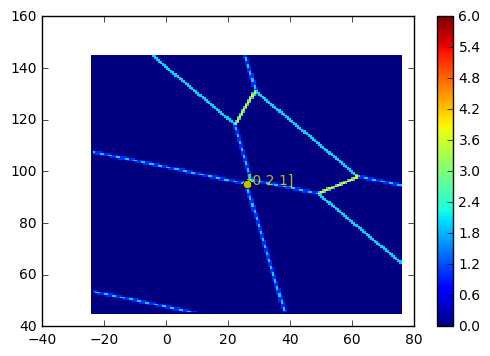

In [4]:
P1 = 25.987333
P2 = 83.0536667
P3 = 94.987333
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3]
dirVecY = [0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0]
rangeX = 100
rangeY = 100
pointsX = 150
pointsY = 150

end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[2],dirVecX[2],dirVecY[2],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

centre_value = np.array([P1,P2,P3])
charge_state = DotSystem.calculate_ground_state(centre_value)

DotSystem.simulate_honeycomb(gate_matrix)

plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.plot(centre_value[0], centre_value[2], 'yo')
plt.annotate(np.array_str(charge_state), xy = (centre_value[0], centre_value[2]), color = 'y')
plt.show()

## 2. N=3 plane

Let's now look at the N=3 plane around the 111 charge state. We will define two axis \epsilon and \delta for changing relative chemical potentials.

### Virtual gates

In [5]:
L = np.linalg.solve(DotSystem.alpha, np.array([1,0,0]))
M = np.linalg.solve(DotSystem.alpha, np.array([0,1,0]))
R = np.linalg.solve(DotSystem.alpha, np.array([0,0,1]))

# \epsilon = L - R
dirVecX = L - R
# \delta = M - (L+R)/2
dirVecY = M - L/2 - R/2

### Use virtual gates to make gate plane

In [6]:
rangeX = 75
rangeY = 125

#end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
#sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

#end_points_y = calculate_end_points(ref_pt,ref_value[2],dirVecX[2],dirVecY[2],rangeX,rangeY)
#sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

sweepx = np.linspace(-rangeX/2,rangeX/2,pointsX)
sweepy = np.linspace(-rangeY/2,rangeY/2,pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

### Run simulation

simulatehoneycomb: 0.61 [s]


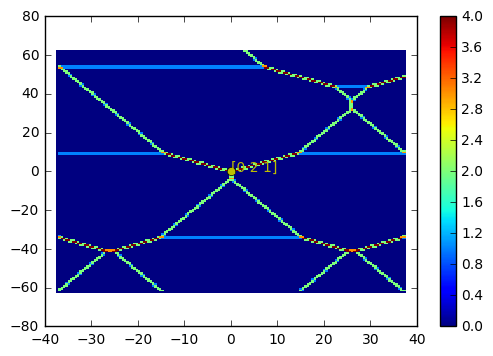

In [7]:
DotSystem.simulate_honeycomb(gate_matrix)

plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.plot(0, 0, 'yo')
plt.annotate(np.array_str(charge_state), xy = (0, 0), color = 'y')
plt.show()

## Middle dot alignment

### Intersection: 102, 201, 111

In [15]:
P1 = 115.0
P2 = -14.0
P3 = 115.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3]

L = np.linalg.solve(DotSystem.alpha, np.array([1,0,0]))
M = np.linalg.solve(DotSystem.alpha, np.array([0,1,0]))
R = np.linalg.solve(DotSystem.alpha, np.array([0,0,1]))

# M
dirVecX = M
# filling: (L + M + R)/3
dirVecY = (L + M + R)/3

rangeX = 20
rangeY = 200

pointsX = 150
pointsY = 150

sweepx = np.linspace(-rangeX/2,rangeX/2,pointsX)
sweepy = np.linspace(-rangeY/2,rangeY/2,pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

simulatehoneycomb: 0.50 [s]


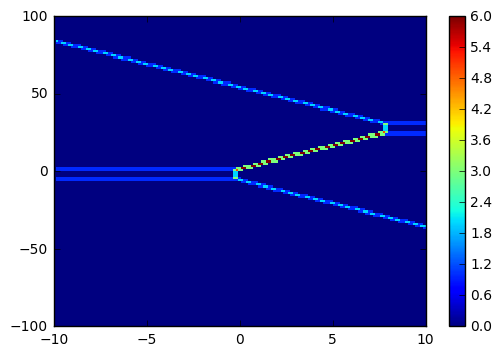

In [16]:
DotSystem.simulate_honeycomb(gate_matrix)

plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.show()

In [17]:
corner1 = ref_value - 0.2*M - 5/3 * (L+M+R)

In [18]:
corner1

array([ 114.02222222,  -14.88888889,  114.02222222])

### Intersection: 012, 021, 111

simulatehoneycomb: 0.50 [s]


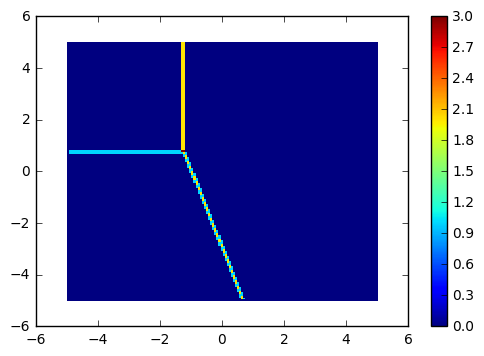

In [13]:
P1 = 45-30+10
P2 = 103-18
P3 = 45+30+10+8

ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3]

L = np.linalg.solve(DotSystem.alpha, np.array([1,0,0]))
M = np.linalg.solve(DotSystem.alpha, np.array([0,1,0]))
R = np.linalg.solve(DotSystem.alpha, np.array([0,0,1]))

# M
dirVecX = M
# filling: (L + M + R)/3
dirVecY = (L + M + R)/3

rangeX = 10
rangeY = 10

pointsX = 150
pointsY = 150

sweepx = np.linspace(-rangeX/2,rangeX/2,pointsX)
sweepy = np.linspace(-rangeY/2,rangeY/2,pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.show()

In [14]:
corner3 = ref_value - 1.22*M + 0.783/3 * (L+M+R)
corner3

array([ 25.98733333,  83.05366667,  93.98733333])

simulatehoneycomb: 0.59 [s]


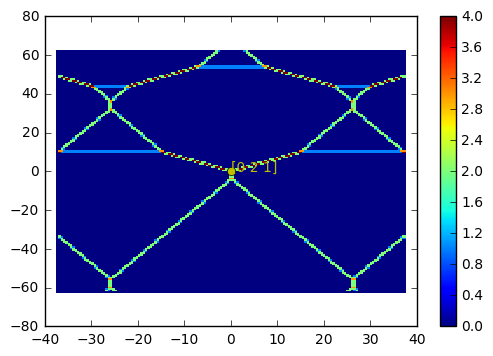

In [20]:
ref_value = corner1
rangeX = 75
rangeY = 125
pointsX = 150
pointsY = 150
# \epsilon = L - R
dirVecX = L - R
# \delta = M - (L+R)/2
dirVecY = M - L/2 - R/2

#end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
#sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

#end_points_y = calculate_end_points(ref_pt,ref_value[2],dirVecX[2],dirVecY[2],rangeX,rangeY)
#sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

sweepx = np.linspace(-rangeX/2,rangeX/2,pointsX)
sweepy = np.linspace(-rangeY/2,rangeY/2,pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.plot(0, 0, 'yo')
plt.annotate(np.array_str(charge_state), xy = (0, 0), color = 'y')
plt.show()

### Intersection: 120, 210, 111

simulatehoneycomb: 10.19 [s]


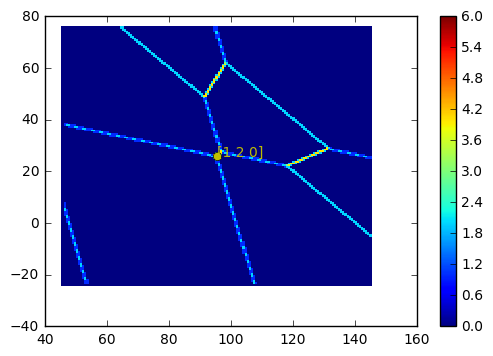

In [56]:
P1 = 95.5
P2 = 83
P3 = 26
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3]
dirVecY = [0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0]
rangeX = 100
rangeY = 100
pointsX = 150
pointsY = 150

end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[2],dirVecX[2],dirVecY[2],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

centre_value = np.array([P1,P2,P3])
charge_state = DotSystem.calculate_ground_state(centre_value)

DotSystem.simulate_honeycomb(gate_matrix)

plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.plot(centre_value[0], centre_value[2], 'yo')
plt.annotate(np.array_str(charge_state), xy = (centre_value[0], centre_value[2]), color = 'y')
plt.show()

simulatehoneycomb: 10.15 [s]


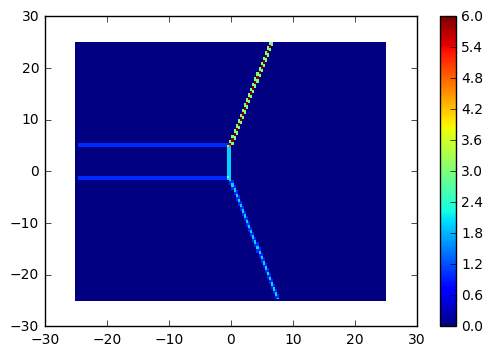

In [57]:
# M
dirVecX = M
# filling: (L + M + R)/3
dirVecY = (L + M + R)/3

rangeX = 50
rangeY = 50

pointsX = 150
pointsY = 150

sweepx = np.linspace(-rangeX/2,rangeX/2,pointsX)
sweepy = np.linspace(-rangeY/2,rangeY/2,pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)
plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.show()

In [49]:
corner2 = ref_value - 0.228*M - 1.516/3 * (L+M+R)
corner2

array([ 95.31511111,  82.45155556,  25.81511111])

### 3 corners -> plane

In [60]:
corner1 = np.array([ 114.02222222,  -14.88888889,  114.02222222])
corner2 = np.array([ 95.31511111,  82.45155556,  25.81511111])
corner3 = np.array([ 25.98733333,  83.05366667,  93.98733333])

np.cross(corner2-corner1,corner3-corner1)

array([ 6689.02489162,  7390.50833334,  6737.1329424 ])

simulatehoneycomb: 10.20 [s]


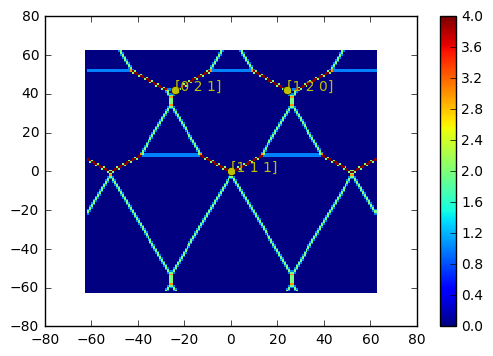

In [81]:
corner1 = np.array([ 114.02222222,  -13,  114.02222222])
ref_value = corner1
rangeX = 125
rangeY = 125
pointsX = 150
pointsY = 150
# \epsilon = L - R
dirVecX = L - R
# \delta = M - (L+R)/2
dirVecY = M - L/2 - R/2

#end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
#sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

#end_points_y = calculate_end_points(ref_pt,ref_value[2],dirVecX[2],dirVecY[2],rangeX,rangeY)
#sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

sweepx = np.linspace(-rangeX/2,rangeX/2,pointsX)
sweepy = np.linspace(-rangeY/2,rangeY/2,pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.plot(0, 0, 'yo')
plt.plot(24, 42, 'yo')
plt.plot(-24, 42, 'yo')
charge_state1 = DotSystem.calculate_ground_state(corner1)
charge_state2 = DotSystem.calculate_ground_state(corner2)
charge_state3 = DotSystem.calculate_ground_state(corner3)
plt.annotate(np.array_str(charge_state1), xy = (0, 0), color = 'y')
plt.annotate(np.array_str(charge_state2), xy = (24, 42), color = 'y')
plt.annotate(np.array_str(charge_state3), xy = (-24, 42), color = 'y')
plt.show()

In [70]:
corner3[0] - 58.02222222

-32.034888890000005

In [71]:
-32.035/(L[0] - R[0])

-24.026249999999997

In [74]:
corner1+42*(M-L/2-R/2)-24*(L-R)

array([ 26.02222222,  83.11111111,  90.02222222])

In [75]:
corner1+42*(M-L/2-R/2)+24*(L-R)

array([ 90.02222222,  83.11111111,  26.02222222])